## 영화 관객 수 데이터를 활용한 데이터 분석
### YB 5기 김채원

## 1. 라이브러리, 데이터 불러오기 및 EDA

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [31]:
train=pd.read_csv("movies_train.csv")
test=pd.read_csv("movies_test.csv")

In [32]:
print(train.shape)
train.head()

(600, 12)


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [33]:
print(test.shape)
test.head()

(243, 11)


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [36]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [37]:
test.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

- 둘 다 'dir_prev_bfnum' 변수에 결측값 존재
- 둘 다 개봉일인 'release_time' 변수의 타입이 datetime이 아니라 object라 바꿔주어야 함
- 'title' 제외하고 'distributor', 'genre', 'screening_rat', 'director'이 object 변수
- 'dir_prev_bfnum' 변수는 왠지 모르겠는데 혼자 float 타입

In [38]:
pd.options.display.float_format = '{:.1f}'.format

train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [39]:
test.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
count,243.0,107.0,243.0,243.0,243.0
mean,109.8,891669.5,0.9,159.3,3.5
std,124.0,1217341.5,1.2,163.0,2.1
min,40.0,34.0,0.0,0.0,0.0
25%,91.0,62502.0,0.0,18.0,2.0
50%,104.0,493120.0,0.0,105.0,3.0
75%,114.5,1080849.6,1.0,282.0,4.0
max,2015.0,6173099.5,6.0,776.0,16.0


<AxesSubplot:>

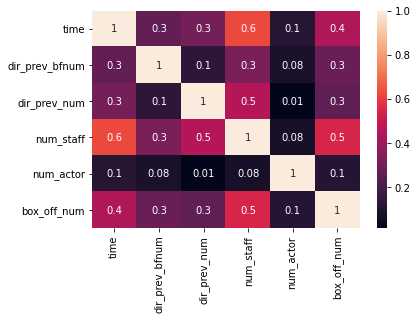

In [40]:
pd.reset_option('display.float_format')
import seaborn as sns

train_corr = train.corr()
sns.heatmap(train_corr, annot=True, fmt='.1g')

## 2. 데이터 전처리

변수 'dir_prev_bfnum' 결측값 채우기

In [41]:
train['dir_prev_bfnum'].fillna(0, inplace=True)
test['dir_prev_bfnum'].fillna(0, inplace=True)

변수 'release_time' 데이터 타입 바꾸기

In [42]:
train['release_time'] = pd.to_datetime(train['release_time'])
test['release_time'] = pd.to_datetime(test['release_time'])

변수 'distributor' 전처리

In [43]:
train['distributor'] = train.distributor.str.replace("(주)", '')
test['distributor'] = test.distributor.str.replace("(주)", '')

import re

train['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in train.distributor]
test['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in test.distributor]

In [44]:
def get_dis(x) :
    if 'CJ' in x or 'CGV' in x :
        return 'CJ'
    elif '쇼박스' in x :
        return '쇼박스'
    elif 'SK' in x :
        return 'SK'
    elif '리틀빅픽' in x :
        return '리틀빅픽처스'
    elif '스폰지' in x :
        return '스폰지'
    elif '싸이더스' in x :
        return '싸이더스'
    elif '에이원' in x :
        return '에이원'
    elif '마인스' in x :
        return '마인스'
    elif '마운틴픽' in x :
        return '마운틴픽처스'
    elif '디씨드' in x :
        return '디씨드'
    elif '드림팩트' in x :
        return '드림팩트'
    elif '메가박스' in x :
        return '메가박스'
    elif '마운틴' in x :
        return '마운틴'
    else :
        return x

In [45]:
train['distributor'] = train.distributor.apply(get_dis)
test['distributor'] = test.distributor.apply(get_dis)

장르별 영화 관객수 평균값으로 랭크 인코딩

In [46]:
train.groupby('genre').box_off_num.mean().sort_values()

genre
뮤지컬       6.627000e+03
다큐멘터리     6.717226e+04
서스펜스      8.261100e+04
애니메이션     1.819267e+05
멜로/로맨스    4.259680e+05
미스터리      5.275482e+05
공포        5.908325e+05
드라마       6.256898e+05
코미디       1.193914e+06
SF        1.788346e+06
액션        2.203974e+06
느와르       2.263695e+06
Name: box_off_num, dtype: float64

In [47]:
train['genre_rank'] = train.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})
test['genre_rank'] = test.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})

배급사별 영화 관객수 중위값 기준으로 배급사 랭크 인코딩

In [48]:
tr_nm_rank = train.groupby('distributor').box_off_num.median().reset_index(name = 'num_rank').sort_values(by = 'num_rank')
tr_nm_rank.head()

,distributor,num_rank
110,인피니티엔터테인먼트,2.0
15,고구마공작소,8.0
52,사람과사람들,42.0
97,위드시네마,46.0
19,나우콘텐츠,54.0


In [49]:
tr_nm_rank['num_rank'] = [i + 1 for i in range(tr_nm_rank.shape[0])]
tr_nm_rank.head()

,distributor,num_rank
110,인피니티엔터테인먼트,1
15,고구마공작소,2
52,사람과사람들,3
97,위드시네마,4
19,나우콘텐츠,5


최종 데이터 병합

In [50]:
train = pd.merge(train, tr_nm_rank, how = 'left')
test = pd.merge(test, tr_nm_rank, how = 'left')

<AxesSubplot:>

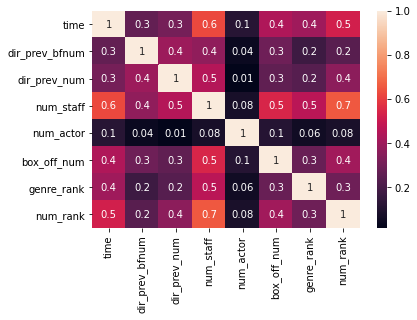

In [51]:
sns.heatmap(train.corr(), annot=True, fmt='.1g')

## 3. 변수 선택 및 모델링

In [57]:
X = train[['num_rank', 'time', 'num_staff', 'num_actor', 'genre_rank', 'screening_rat']]
y = np.log1p(train.box_off_num)

In [58]:
X = pd.get_dummies(columns = ['screening_rat'], data = X)
X['num_actor'] = np.log1p(X['num_actor'])

In [59]:
target = test[['num_rank', 'time', 'num_staff', 'num_actor', 'genre_rank', 'screening_rat']]
target = pd.get_dummies(columns = ['screening_rat'], data = target)
target['num_actor'] = np.log1p(target['num_actor'])

In [61]:
#교차검증
from sklearn.model_selection import KFold
kf = KFold(n_splits =  10, shuffle = True, random_state = 1)

LGBMRegressor

In [63]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
lgbm = LGBMRegressor(random_state=1)

rmse_list = []
lgb_pred = np.zeros((test.shape[0]))
for tr_idx, te_idx in kf.split(X,y):
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    te_x, te_y = X.iloc[te_idx], y.iloc[te_idx]
    
    lgbm.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x<0 else x for x in lgbm.predict(te_x)])
    sub_pred = np.expm1([0 if x<0 else x for x in lgbm.predict(target)])
    rmse = np.sqrt(mean_squared_error(te_y, pred))
    rmse_list.append(rmse)
    lgb_pred += (sub_pred/10)
    
np.mean(rmse_list)

1214336.3797565873

In [65]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,500,1000], 
    'learning_rate':[0.01, 0.05, 0.1]
}

grid_lgb = GridSearchCV(LGBMRegressor(), param_grid = params, scoring='neg_mean_squared_error', cv=5)
grid_lgb.fit(tr_x, tr_y)
rmse = np.sqrt(-1*grid_lgb.best_score_)
print('평균 RMSE값:', rmse, '최적 parameters:', grid_lgb.best_params_)

평균 RMSE값: 1.6023274195048773 최적 parameters: {'learning_rate': 0.01, 'n_estimators': 500}


In [70]:
lgbm = LGBMRegressor(learning_rate=0.01, n_estimators=500, random_state=1)
rmse_list = []
lgb_pred = np.zeros((test.shape[0]))

for tr_idx, te_idx in kf.split(X,y):
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    te_x, te_y = X.iloc[te_idx], y.iloc[te_idx]
    
    lgbm.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x<0 else x for x in lgbm.predict(te_x)])
    sub_pred = np.expm1([0 if x<0 else x for x in lgbm.predict(target)])
    rmse = np.sqrt(mean_squared_error(te_y, pred))
    rmse_list.append(rmse)
    lgb_pred += (sub_pred/10)
    
np.mean(rmse_list)

1009189.0110210854

In [75]:
lgb_pred.shape

(243,)

## 4. 결과 저장

In [79]:
submission = pd.read_csv("submission.csv")
submission['box_off_num'] = lgb_pred

In [80]:
submission.sort_values(by='box_off_num')

,title,box_off_num
39,REC 알이씨,9.066697e+01
130,댄서김의 은밀한 교수법,9.673366e+01
139,화려한 외출,1.020348e+02
167,바리새인,1.443690e+02
173,옹녀뎐,1.445579e+02
...,...,...
135,용의자,4.326221e+06
178,명량,4.960669e+06
179,군도: 민란의 시대,5.079962e+06
229,베테랑,5.756601e+06


In [81]:
submission.to_csv('dinga_submission.csv', index=False)